<a href="https://colab.research.google.com/github/nerobero/Spotify-DS-project/blob/main/DS_Proj_Identifying_trends_patterns_in_features_of_Global_Top_200_songs_on_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proj: Identifying trends/patterns in features of Global Top 200 songs on Spotify

Joshua Lin, Son Nguyen, Jolene Okamoto, Ji Yoon Rhee


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_alternative_music = pd.read_csv('drive/My Drive/DS3000 dataset/alternative_music_data.csv')
df_rock_music = pd.read_csv('drive/My Drive/DS3000 dataset/rock_music_data.csv')
df_metal_music = pd.read_csv('drive/My Drive/DS3000 dataset/metal_music_data.csv')
df_pop_music = pd.read_csv('drive/My Drive/DS3000 dataset/pop_music_data.csv')
df_indie_alt_music = pd.read_csv('drive/My Drive/DS3000 dataset/indie_alt_music_data.csv')
df_blues_music = pd.read_csv('drive/My Drive/DS3000 dataset/blues_music_data.csv')
df_hiphop_music = pd.read_csv('drive/My Drive/DS3000 dataset/hiphop_music_data.csv')

## Get the dimensions of the data

In [ ]:
print(df_alternative_music.shape)
print(df_rock_music.shape)
print(df_metal_music.shape)
print(df_pop_music.shape)
print(df_blues_music.shape)
print(df_hiphop_music.shape)
print(df_indie_alt_music.shape)

(2160, 22)
(8747, 22)
(3045, 22)
(3831, 22)
(2050, 22)
(2581, 22)
(4338, 22)


## Inspect Data

In [ ]:
print(df_alternative_music.head)

<bound method NDFrame.head of           Artist Name                 Track Name  Popularity  \
0               James                       Laid          66   
1            grandson            In Over My Head          60   
2               Foals                On The Luna          51   
3            Longpigs                   She Said          47   
4        Beastie Boys                  Sure Shot          57   
...               ...                        ...         ...   
2155        The Shins                  So Says I          51   
2156  Yeah Yeah Yeahs                  Gold Lion          54   
2157  Lianne La Havas  Seven Times - Wu-Lu Remix          53   
2158         Sløtface                   Luminous          27   
2159   *repeat repeat            Wind in My Sail          23   

                                                 Genres             Playlist  \
0     ['britpop', 'madchester', 'new wave', 'new wav...      Alternative 90s   
1     ['modern alternative rock', 'modern

In [ ]:
print(df_rock_music.head)

<bound method NDFrame.head of                   Artist Name  \
0             God Street Wine   
1                 cleopatrick   
2                    grandson   
3              Counting Crows   
4                Led Zeppelin   
...                       ...   
8742                blink-182   
8743                  Beloved   
8744              Saint Louis   
8745    The Smashing Pumpkins   
8746  Van Der Graaf Generator   

                                             Track Name  Popularity  \
0                                           Nightingale           5   
1                                              hometown          63   
2                                       In Over My Head          60   
3                               Bobby and the Rat-Kings           0   
4                                  Black Dog - Remaster          72   
...                                                 ...         ...   
8742                                         I Miss You           0   
8743 

In [ ]:
print(df_metal_music.head)

<bound method NDFrame.head of               Artist Name                          Track Name  Popularity  \
0                  Myrkur                                Ella          42   
1               Monuments                            Deadnest          51   
2     The Southern Oracle                            Prisoner          20   
3               Insomnium                        The Reticent           0   
4                Galleons  Playing With Fire is Such a Cliché          42   
...                   ...                                 ...         ...   
3040             Behemoth                   Decade of Therion          31   
3041    Killswitch Engage                            My Curse          68   
3042       Changing Tides                              Guided          27   
3043            Demolizer                 Cancer in the Brain          15   
3044                 TOOL                           Stinkfist          66   

                                             

In [ ]:
print(df_pop_music.head)

<bound method NDFrame.head of                      Artist Name                 Track Name  Popularity  \
0                         Prides  A Wilder Heart - Acoustic          40   
1                      Sam Smith        Diamonds - Acoustic          59   
2                 The Polar Boys                     Let Go          35   
3                    Ginger Root                    Weather          46   
4                      Noa Kirel                      'פאוץ          49   
...                          ...                        ...         ...   
3826                 Yuval Dayan                 Mesunveret          28   
3827                   Dolly Ave            Waiting for You          21   
3828  Monthly Mu & New Caledonia                      ISSUE          36   
3829                    Zoe Wees   Hold Me Like You Used To          31   
3830               Mike Williams                Without You          68   

                                                 Genres           Pla

In [ ]:
print(df_blues_music.head)

<bound method NDFrame.head of            Artist Name                                         Track Name  \
0        T-Bone Walker  Call It Stormy Monday (But Tuesday Is Just As ...   
1       Hayes McMullan                              Goin' Away Mama Blues   
2       Lucky Peterson                                           50 Years   
3          Lazer Lloyd                                        Backstreets   
4     Sylvester Weaver                                         Guitar Rag   
...                ...                                                ...   
2045         Ry Cooder                                    Available Space   
2046       Cheap Trick                                     California Man   
2047    The Black Keys                                        Eagle Birds   
2048  Thee Headcoatees                                 Round Every Corner   
2049         Tampa Red                              You Missed A Good Man   

      Popularity                             

In [ ]:
print(df_hiphop_music.head)

<bound method NDFrame.head of                Artist Name                                         Track Name  \
0                21 Savage                                             Spiral   
1                VIC MENSA       SHELTER ft Wyclef Jean, ft Chance The Rapper   
2             Pooh Shiesty             Welcome To The Riches (feat. Lil Baby)   
3     Athletic Progression                                       Stepney Tale   
4                   Ghetts                                 Fire and Brimstone   
...                    ...                                                ...   
2576                Devlin                                  Community Outcast   
2577                    YG                                    Drop A Location   
2578       Aretha Franklin            (You Make Me Feel Like) A Natural Woman   
2579                Mooski  Track Star (feat. Chris Brown, A Boogie wit da...   
2580           Salt-N-Pepa                                            Push It  

In [ ]:
print(df_indie_alt_music.head)

<bound method NDFrame.head of                 Artist Name                       Track Name  Popularity  \
0                     James                             Laid          66   
1                tøm hughes                          obvious          30   
2           Amnesia Scanner                     AS Too Wrong          38   
3                     Lisel                      In the Dome          13   
4               beabadoobee                         Worth It          51   
...                     ...                              ...         ...   
4333        Yeah Yeah Yeahs                             Maps          68   
4334               Sløtface                         Luminous          27   
4335         *repeat repeat                  Wind in My Sail          23   
4336  Designed Intervention  Strangers Who Know Every Secret          37   
4337                   Loop              Vapour (Remastered)           4   

                                                 Genres  

## EDA for Alternative Music

In [ ]:
print(df_alternative_music.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2159
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       2160 non-null   object 
 1   Track Name        2160 non-null   object 
 2   Popularity        2160 non-null   int64  
 3   Genres            2160 non-null   object 
 4   Playlist          2160 non-null   object 
 5   danceability      2160 non-null   float64
 6   energy            2160 non-null   float64
 7   key               2160 non-null   int64  
 8   loudness          2160 non-null   float64
 9   mode              2160 non-null   int64  
 10  speechiness       2160 non-null   float64
 11  acousticness      2160 non-null   float64
 12  instrumentalness  2160 non-null   float64
 13  liveness          2160 non-null   float64
 14  valence           2160 non-null   float64
 15  tempo             2160 non-null   float64
 16  id                2160 non-null   object 


There are no null values and the data types look good.

In [ ]:
# remove any duplicate rows
df_alternative_music.drop_duplicates(inplace=True)

In [ ]:
print(df_alternative_music.shape) 

(2160, 22)


After analyzing the alternative music dataset, it looks like all the types are correct and there are no null values. There were also no duplicate rows.

In [ ]:
print("median: ", df_alternative_music['Popularity'].median())
print(df_alternative_music['Popularity'].describe())

median:  46.0
count    2160.000000
mean       46.292593
std        15.709455
min         0.000000
25%        37.000000
50%        46.000000
75%        57.000000
max        89.000000
Name: Popularity, dtype: float64


Looking at the statistics, we can see that alternative music has a mean popularity score of 46.29. The median is similar at 46.0. This means the data is likely balanced. We can also see this reflected in the percentiles. The lower 50% of data has a range of 46, and the upper 50% of data has a range of 43.

## EDA for Rock Music

In [ ]:
print(df_rock_music.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8747 entries, 0 to 8746
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       8747 non-null   object 
 1   Track Name        8747 non-null   object 
 2   Popularity        8747 non-null   int64  
 3   Genres            8747 non-null   object 
 4   Playlist          8747 non-null   object 
 5   danceability      8747 non-null   float64
 6   energy            8747 non-null   float64
 7   key               8747 non-null   int64  
 8   loudness          8747 non-null   float64
 9   mode              8747 non-null   int64  
 10  speechiness       8747 non-null   float64
 11  acousticness      8747 non-null   float64
 12  instrumentalness  8747 non-null   float64
 13  liveness          8747 non-null   float64
 14  valence           8747 non-null   float64
 15  tempo             8747 non-null   float64
 16  id                8747 non-null   object 


There are no null values and the data types look good.

In [ ]:
# remove any duplicate rows
df_rock_music.drop_duplicates(inplace=True)

In [ ]:
print(df_rock_music.shape)

(8747, 22)


After analyzing the rock music dataset, it looks like all the types are correct and there are no null values. There were also no duplicate rows.

In [ ]:
print("median: ", df_rock_music['Popularity'].median())
print(df_rock_music['Popularity'].describe())

median:  50.0
count    8747.000000
mean       48.797645
std        18.401529
min         0.000000
25%        37.000000
50%        50.000000
75%        63.000000
max        93.000000
Name: Popularity, dtype: float64


Looking at the statistics, we can see that rock music has a mean popularity score of 48.80. The median is similar at 50. This means the data is likely balanced. We can also see this reflected in the percentiles. The lower 50% of data has a range of 50, and the upper 50% of data has a range of 43.

## EDA for Metal Music

In [ ]:
print(df_metal_music.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3045 entries, 0 to 3044
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       3045 non-null   object 
 1   Track Name        3045 non-null   object 
 2   Popularity        3045 non-null   int64  
 3   Genres            3045 non-null   object 
 4   Playlist          3045 non-null   object 
 5   danceability      3045 non-null   float64
 6   energy            3045 non-null   float64
 7   key               3045 non-null   int64  
 8   loudness          3045 non-null   float64
 9   mode              3045 non-null   int64  
 10  speechiness       3045 non-null   float64
 11  acousticness      3045 non-null   float64
 12  instrumentalness  3045 non-null   float64
 13  liveness          3045 non-null   float64
 14  valence           3045 non-null   float64
 15  tempo             3045 non-null   float64
 16  id                3045 non-null   object 


There are no null values and the data types look good.

In [ ]:
# remove any duplicate rows
df_metal_music.drop_duplicates(inplace=True)

In [ ]:
print(df_metal_music.shape)

(3045, 22)


After analyzing the metal music dataset, it looks like all the types are correct and there are no null values. There were also no duplicate rows.

In [ ]:
print("median: ", df_metal_music['Popularity'].median())
print(df_metal_music['Popularity'].describe())

median:  42.0
count    3045.000000
mean       42.803284
std        15.472085
min         0.000000
25%        34.000000
50%        42.000000
75%        52.000000
max        84.000000
Name: Popularity, dtype: float64


Looking at the statistics, we can see that metal music has a mean popularity score of 42.80. The median is similar at 42. This means the data is likely balanced. We can also see this reflected in the percentiles. The lower 50% of data has a range of 42, and the upper 50% of data has a range of 42.

# EDA for Pop Music

In [ ]:
print(df_pop_music.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3831 entries, 0 to 3830
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       3831 non-null   object 
 1   Track Name        3831 non-null   object 
 2   Popularity        3831 non-null   int64  
 3   Genres            3831 non-null   object 
 4   Playlist          3831 non-null   object 
 5   danceability      3831 non-null   float64
 6   energy            3831 non-null   float64
 7   key               3831 non-null   int64  
 8   loudness          3831 non-null   float64
 9   mode              3831 non-null   int64  
 10  speechiness       3831 non-null   float64
 11  acousticness      3831 non-null   float64
 12  instrumentalness  3831 non-null   float64
 13  liveness          3831 non-null   float64
 14  valence           3831 non-null   float64
 15  tempo             3831 non-null   float64
 16  id                3831 non-null   object 


There are no null values and the data types look good.

In [ ]:
# remove any duplicate rows
df_pop_music.drop_duplicates(inplace=True)
print(df_pop_music.shape)

(3831, 22)


After analyzing the pop music dataset, it looks like all the types are correct and there are no null values. There were also no duplicate rows.

In [ ]:
print("median: ", df_pop_music['Popularity'].median())
print(df_pop_music['Popularity'].describe())

median:  52.0
count    3831.000000
mean       53.173062
std        21.725178
min         0.000000
25%        36.000000
50%        52.000000
75%        71.500000
max       100.000000
Name: Popularity, dtype: float64


Looking at the statistics, we can see that pop music has a mean popularity score of 53.17. The median is similar at 52. This means the data is likely balanced. We can also see this reflected in the percentiles. The lower 50% of data has a range of 52, and the upper 50% of data has a range of 48.

# EDA for Indie Alternative Music

In [ ]:
print(df_indie_alt_music.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 0 to 4337
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       4338 non-null   object 
 1   Track Name        4338 non-null   object 
 2   Popularity        4338 non-null   int64  
 3   Genres            4338 non-null   object 
 4   Playlist          4338 non-null   object 
 5   danceability      4338 non-null   float64
 6   energy            4338 non-null   float64
 7   key               4338 non-null   int64  
 8   loudness          4338 non-null   float64
 9   mode              4338 non-null   int64  
 10  speechiness       4338 non-null   float64
 11  acousticness      4338 non-null   float64
 12  instrumentalness  4338 non-null   float64
 13  liveness          4338 non-null   float64
 14  valence           4338 non-null   float64
 15  tempo             4338 non-null   float64
 16  id                4338 non-null   object 


There are no null values and the data types look good.

In [ ]:
# remove any duplicate rows
df_indie_alt_music.drop_duplicates(inplace=True)
print(df_indie_alt_music.shape)

(4338, 22)


After analyzing the indie alternative music dataset, it looks like all the types are correct and there are no null values. There were also no duplicate rows.

In [ ]:
print("median: ", df_indie_alt_music['Popularity'].median())
print(df_indie_alt_music['Popularity'].describe())

median:  43.0
count    4338.000000
mean       42.723144
std        17.181050
min         0.000000
25%        32.000000
50%        43.000000
75%        55.000000
max        89.000000
Name: Popularity, dtype: float64


Looking at the statistics, we can see that indie alt music has a mean popularity score of 42.72. The median is similar at 43. This means the data is likely balanced. The range is slightly more spread out in the lower percentile (indicating that there might be several outliers on the left). The lower 50% of data has a range of 43, and the upper 50% of data has a range of 33.

# EDA for Blues Music

EDA for Blues Music

In [ ]:
print(df_blues_music.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 0 to 2049
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       2050 non-null   object 
 1   Track Name        2050 non-null   object 
 2   Popularity        2050 non-null   int64  
 3   Genres            2050 non-null   object 
 4   Playlist          2050 non-null   object 
 5   danceability      2050 non-null   float64
 6   energy            2050 non-null   float64
 7   key               2050 non-null   int64  
 8   loudness          2050 non-null   float64
 9   mode              2050 non-null   int64  
 10  speechiness       2050 non-null   float64
 11  acousticness      2050 non-null   float64
 12  instrumentalness  2050 non-null   float64
 13  liveness          2050 non-null   float64
 14  valence           2050 non-null   float64
 15  tempo             2050 non-null   float64
 16  id                2050 non-null   object 


There are no null values and the data types look good.

In [ ]:
# remove any duplicate rows
df_blues_music.drop_duplicates(inplace=True)
print(df_blues_music.shape)

(2050, 22)


After analyzing the blues music dataset, it looks like all the types are correct and there are no null values. There were also no duplicate rows.

In [ ]:
print("median: ", df_blues_music['Popularity'].median())
print(df_blues_music['Popularity'].describe())

median:  35.0
count    2050.000000
mean       33.831707
std        13.884009
min         0.000000
25%        26.000000
50%        35.000000
75%        42.000000
max        76.000000
Name: Popularity, dtype: float64


Looking at the statistics, we can see that blues music has a mean popularity score of 33.83. The median is similar at 35. This means the data is likely balanced. We can also see this reflected in the percentiles. The lower 50% of data has a range of 35, and the upper 50% of data has a range of 34.

# EDA for Hip Hop Music

In [ ]:
print(df_hiphop_music.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2581 entries, 0 to 2580
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist Name       2581 non-null   object 
 1   Track Name        2581 non-null   object 
 2   Popularity        2581 non-null   int64  
 3   Genres            2581 non-null   object 
 4   Playlist          2581 non-null   object 
 5   danceability      2581 non-null   float64
 6   energy            2581 non-null   float64
 7   key               2581 non-null   int64  
 8   loudness          2581 non-null   float64
 9   mode              2581 non-null   int64  
 10  speechiness       2581 non-null   float64
 11  acousticness      2581 non-null   float64
 12  instrumentalness  2581 non-null   float64
 13  liveness          2581 non-null   float64
 14  valence           2581 non-null   float64
 15  tempo             2581 non-null   float64
 16  id                2581 non-null   object 


There are no null values and the data types look good.

In [ ]:
# remove any duplicate rows
df_hiphop_music.drop_duplicates(inplace=True)
print(df_hiphop_music.shape)

(2581, 22)


After analyzing the hip hop music dataset, it looks like all the types are correct and there are no null values. There were also no duplicate rows.

In [ ]:
print("median: ", df_hiphop_music['Popularity'].median())
print(df_hiphop_music['Popularity'].describe())

median:  53.0
count    2581.000000
mean       50.826424
std        21.043295
min         0.000000
25%        38.000000
50%        53.000000
75%        66.000000
max       100.000000
Name: Popularity, dtype: float64


Looking at the statistics, we can see that hip hop music has a mean popularity score of 50.82. The median is slightly higher at 53.0. This means the data could be slightly negatively skewed. If we look at the percentiles, the lower 50% of data has a range of 53, and the upper 50% of data has a range of 47. This reflects that there is a slight negative skew since the upper 50% percent of data has a smaller range.

# Looking into popularity

Since pop music was the most popular genre, we are going to see if there are trends between popularity and danceability, engergy, loudness, etc.

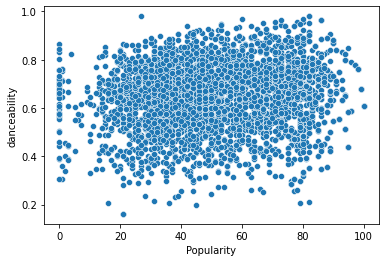

In [ ]:
pop_popularity_and_danceability = df_pop_music[['Popularity', 'danceability']]

sns.scatterplot(data=pop_popularity_and_danceability, x='Popularity', y='danceability')
plt.show()

In [ ]:
pop_popularity = pop_popularity_and_danceability['Popularity']
pop_danceability = pop_popularity_and_danceability['danceability']
corr, p_value = stats.pearsonr(pop_popularity, pop_danceability)
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  0.13410127899912552
The p-value is:  7.738548610652055e-17


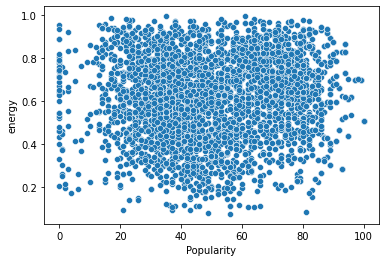

In [ ]:
pop_popularity_and_energy = df_pop_music[['Popularity', 'energy']]

sns.scatterplot(data=pop_popularity_and_energy, x='Popularity', y='energy')
plt.show()

In [ ]:
pop_energy = pop_popularity_and_energy['energy']
corr, p_value = stats.pearsonr(pop_popularity, pop_energy)
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  0.08270176930866603
The p-value is:  2.9605040230356103e-07


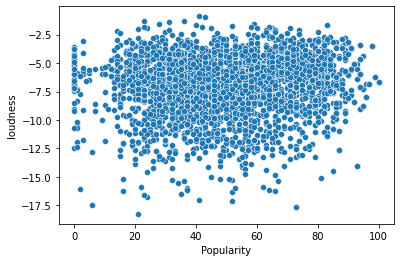

In [ ]:
pop_popularity_and_loudness = df_pop_music[['Popularity', 'loudness']]

sns.scatterplot(data=pop_popularity_and_loudness, x='Popularity', y='loudness')
plt.show()

In [ ]:
pop_loudness = pop_popularity_and_loudness['loudness']
corr, p_value = stats.pearsonr(pop_popularity, pop_loudness)
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  0.12211710904718247
The p-value is:  3.3407807702086815e-14


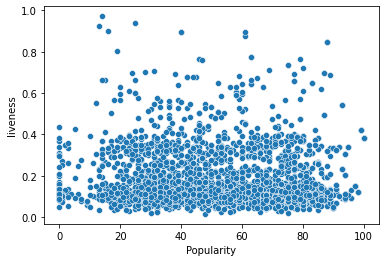

In [ ]:
pop_popularity_and_liveness = df_pop_music[['Popularity', 'liveness']]

sns.scatterplot(data=pop_popularity_and_liveness, x='Popularity', y='liveness')
plt.show()

In [ ]:
pop_liveness = pop_popularity_and_liveness['liveness']
corr, p_value = stats.pearsonr(pop_popularity, pop_liveness)
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  -0.00957029338000064
The p-value is:  0.5537339058676319


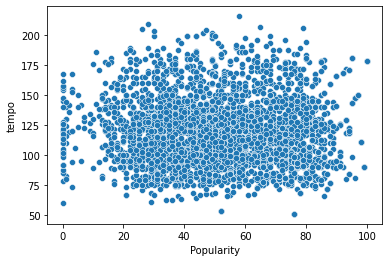

In [ ]:
pop_popularity_and_tempo = df_pop_music[['Popularity', 'tempo']]

sns.scatterplot(data=pop_popularity_and_tempo, x='Popularity', y='tempo')
plt.show()

In [ ]:
pop_tempo = pop_popularity_and_tempo['tempo']
corr, p_value = stats.pearsonr(pop_popularity, pop_tempo)
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  0.007235558463953336
The p-value is:  0.6543660201339799


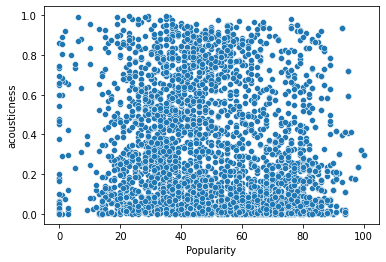

In [ ]:
pop_popularity_and_acousticness = df_pop_music[['Popularity', 'acousticness']]

sns.scatterplot(data=pop_popularity_and_acousticness, x='Popularity', y='acousticness')
plt.show()

In [ ]:
pop_acousticness = pop_popularity_and_acousticness['acousticness']
corr, p_value = stats.pearsonr(pop_popularity, pop_acousticness)
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  -0.16104312254447334
The p-value is:  1.1245359562213742e-23


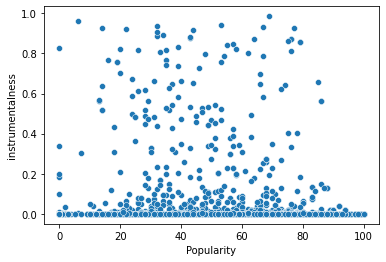

In [ ]:
pop_popularity_and_instrumentalness = df_pop_music[['Popularity', 'instrumentalness']]

sns.scatterplot(data=pop_popularity_and_instrumentalness, x='Popularity', y='instrumentalness')
plt.show()

In [ ]:
pop_instrumentalness = pop_popularity_and_instrumentalness['instrumentalness']
corr, p_value = stats.pearsonr(pop_popularity, pop_instrumentalness)
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  -0.07223430990157821
The p-value is:  7.629134484939757e-06


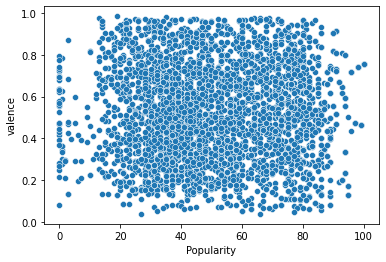

In [ ]:
pop_popularity_and_valence = df_pop_music[['Popularity', 'valence']]

sns.scatterplot(data=pop_popularity_and_valence, x='Popularity', y='valence')
plt.show()

In [ ]:
pop_valence = pop_popularity_and_valence['valence']
corr, p_value = stats.pearsonr(pop_popularity, pop_valence)
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  -0.007272430484674828
The p-value is:  0.6527200523264726


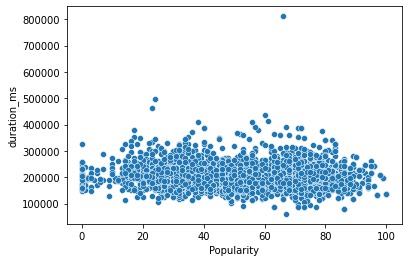

In [ ]:
pop_popularity_and_duration_ms = df_pop_music[['Popularity', 'duration_ms']]

sns.scatterplot(data=pop_popularity_and_duration_ms, x='Popularity', y='duration_ms')
plt.show()

In [ ]:
pop_duration_ms = pop_popularity_and_duration_ms['duration_ms']
corr, p_value = stats.pearsonr(pop_popularity, pop_duration_ms)
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  -0.11158203563412158
The p-value is:  4.336378468746125e-12


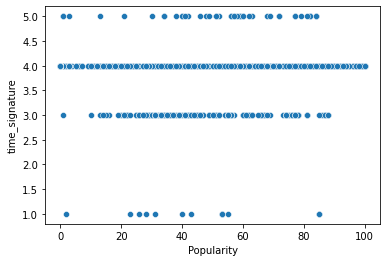

In [ ]:
pop_popularity_and_time_signature = df_pop_music[['Popularity', 'time_signature']]

sns.scatterplot(data=pop_popularity_and_time_signature, x='Popularity', y='time_signature')
plt.show()

In [ ]:
pop_time_signature = pop_popularity_and_time_signature['time_signature']
corr, p_value = stats.pearsonr(pop_popularity, pop_time_signature)
print('The correlation coefficient is: ', corr)
print('The p-value is: ', p_value)

The correlation coefficient is:  0.0531748159658793
The p-value is:  0.0009929579250861748


Looking at different relationships with popularity in pop music, we can see that there aren't any trends that stand out. None of the plots have a strong correlation. The strongest correlation was a value of 0.13 between popularity and danceability. There were also multiple relationships that have a negative correlation, but none were strong negative correlations. The p-value for some cases is > 0.05, which is not statistically significant and indicates strong evidence for the null hypothesis - no trends/relationships between popularity and features.

# Data partitioning

In [ ]:
# merge all dataframes together
"""
df_alternative_music = pd.read_csv('drive/My Drive/DS3000 dataset/alternative_music_data.csv')
df_rock_music = pd.read_csv('drive/My Drive/DS3000 dataset/rock_music_data.csv')
df_metal_music = pd.read_csv('drive/My Drive/DS3000 dataset/metal_music_data.csv')
df_pop_music = pd.read_csv('drive/My Drive/DS3000 dataset/pop_music_data.csv')
df_indie_alt_music = pd.read_csv('drive/My Drive/DS3000 dataset/indie_alt_music_data.csv')
df_blues_music = pd.read_csv('drive/My Drive/DS3000 dataset/blues_music_data.csv')
df_hiphop_music = pd.read_csv('drive/My Drive/DS3000 dataset/hiphop_music_data.csv')
"""

maindf = pd.concat([df_alternative_music, df_rock_music, df_metal_music, df_pop_music, df_indie_alt_music, df_blues_music, df_hiphop_music], axis=0)

In [ ]:
print(maindf.shape)

(26752, 22)


In [ ]:
maindf.head()

,Artist Name,Track Name,Popularity,Genres,Playlist,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature
0,James,Laid,66,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,...,0.000276,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4
1,grandson,In Over My Head,60,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,...,0.015800,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4
2,Foals,On The Luna,51,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,...,0.000392,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4
3,Longpigs,She Said,47,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,...,0.000488,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4
4,Beastie Boys,Sure Shot,57,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,...,0.000000,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4


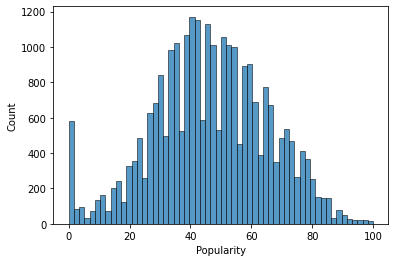

In [ ]:
# Display the count of songs with different popularity score

sns.histplot(maindf['Popularity'], bins='auto')


In [ ]:
maindf['Popularity'].describe()

count    26752.000000
mean        46.603544
std         18.890180
min          0.000000
25%         34.000000
50%         46.000000
75%         60.000000
max        100.000000
Name: Popularity, dtype: float64

We decide to focus to divide the popularity column into 1s and 0s, where 1 is popular and 0 is not popular, in order to be popular, the popularity score must pass the threshold of 50 as then the algorithm of spotify will determine it to be more popular than the rest.




In [ ]:
maindf['Is Popular']=(maindf['Popularity']>=50).astype('int')
maindf.drop(['Popularity'], axis=1, inplace=True)

In [ ]:
maindf['Is Popular'].describe()

count    26752.000000
mean         0.436565
std          0.495969
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Is Popular, dtype: float64

In [ ]:
print(maindf[maindf['Is Popular'] == 1].shape)
print(maindf[maindf['Is Popular'] == 0].shape)

(11679, 22)
(15073, 22)


In [ ]:
maindf.head()

,Artist Name,Track Name,Genres,Playlist,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,Is Popular
0,James,Laid,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,0.0317,...,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4,1
1,grandson,In Over My Head,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,0.0399,...,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4,1
2,Foals,On The Luna,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,0.0479,...,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4,1
3,Longpigs,She Said,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,0.0606,...,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4,0
4,Beastie Boys,Sure Shot,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,0.1640,...,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4,1


In [ ]:
# dividing the dataframe into X (features) and y (target) variables:
X = maindf[['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence',
            'tempo','liveness', 'loudness', 'speechiness']]
y = maindf['Is Popular']
X = pd.get_dummies(X, drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                   )

# Logistic Regression

In [ ]:
X_train_lr = X_train.copy()
y_train_lr = y_train.copy()
X_test_lr = X_test.copy()
y_test_lr = y_test.copy()

Now we scale the data:

In [ ]:
scaler = StandardScaler()

X_train_lr = scaler.fit_transform(X_train_lr)
X_test_lr = scaler.transform(X_test_lr)

In [ ]:
y_train_lr.value_counts(normalize=True)

0    0.559009
1    0.440991
Name: Is Popular, dtype: float64

In [ ]:
lr_model = LogisticRegression().fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)
print(y_pred_lr)

[0 1 1 ... 0 1 1]


In [ ]:
print("The accuracy is", lr_model.score(X_test_lr, y_test_lr))

The accuracy is 0.6016695738848742


The accuracy value measures how well the regression line fits the data. If the value is 1, it means the model fits the data perfectly. Our accuracy is 0.602. This means that the logistic regression model does not fit the data very well.

In [ ]:
print(classification_report(y_test_lr, y_pred_lr, target_names = ['unpopular', 'popular']))

              precision    recall  f1-score   support

   unpopular       0.63      0.74      0.68      4605
     popular       0.54      0.42      0.47      3421

    accuracy                           0.60      8026
   macro avg       0.59      0.58      0.58      8026
weighted avg       0.59      0.60      0.59      8026



The recall and f1-score for unpopular data turns out to be much more higher than the popular ones, this might be because popularity can't be defined just in terms of small features.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


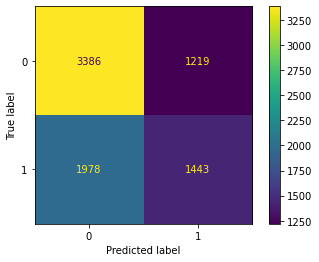

In [ ]:
plot_confusion_matrix(estimator=lr_model, X=X_test_lr, y_true=y_test_lr)

Our model for linear regression seems to have a lot of True Positives, however, it has a low amount of True Negatives and a high amount of False Negatives, which is not a good thing as this shows we may have a Type 2 error.

In [ ]:
features_imp = pd.Series(lr_model.coef_[0], index=X_train.columns).sort_values(ascending=False)
features_imp = features_imp.reset_index()
features_imp.columns= ["Features", "Coefficient Value"]
print(features_imp)

           Features  Coefficient Value
0      danceability           0.174773
1          loudness           0.154007
2           valence           0.024225
3       speechiness           0.016390
4             tempo          -0.006640
5       duration_ms          -0.027836
6          liveness          -0.084134
7            energy          -0.197702
8      acousticness          -0.254596
9  instrumentalness          -0.329623


Text(0, 0.5, 'Features')

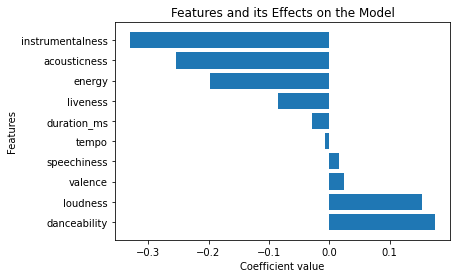

In [ ]:
fig, ax = plt.subplots()
ax.barh(features_imp['Features'], features_imp['Coefficient Value'])
plt.title("Features and its Effects on the Model")
plt.xlabel("Coefficient value")
plt.ylabel("Features")

Looking at the feature importance graph, we can see that loudness and dancability were the most important features in the logistic regression model. On the other hand, instrucmentalness and acousticness had negative effects on song popularity. However, it is important to note that the range of feature importance values is very small.

# DecisionTreeClassifier

In [ ]:
X_train_dt = X_train.copy()
y_train_dt = y_train.copy()
X_test_dt = X_test.copy()
y_test_dt = y_test.copy()
dt = DecisionTreeClassifier(criterion='entropy', random_state = 7)
dt.fit(X_train_dt, y_train_dt)

#predict the labels for the test set:
y_pred_dt = dt.predict(X_test_dt)

print('The predicted popularity is : {}'.format(y_pred_dt))

#evaluate the predictions: 
print('The accuracy of the model is:', dt.score(X_test_dt, y_test_dt))
print(classification_report(y_test_dt, y_pred_dt, target_names = ['unpopular', 'popular']))

The predicted popularity is : [0 0 1 ... 1 1 1]
The accuracy of the model is: 0.7545477199102916
              precision    recall  f1-score   support

   unpopular       0.81      0.75      0.78      4605
     popular       0.69      0.76      0.73      3421

    accuracy                           0.75      8026
   macro avg       0.75      0.76      0.75      8026
weighted avg       0.76      0.75      0.76      8026



The accuracy of our decision tree classification model is 75.5%, which is pretty good. Precision is the accuracy of positive predictions, and we can see that precision is higher for unpopular songs. This makes sense because there are more unpopular songs in the training data.

The recall is the number of positive cases. It is very similar for both unpopular and popular songs.

The f1-score is the percentage of positive predictions that were correct. It is highest for unpopular songs, but both scores are very similar.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


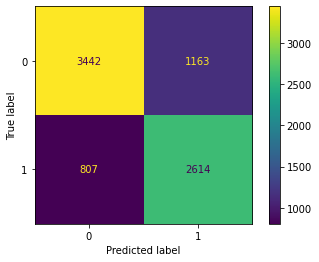

In [ ]:
plot_confusion_matrix(estimator=dt, X=X_test_dt, y_true=y_test_dt)

From the confusion matrix above, we can see that we have a very high amount of True Positives (3442) and True Negatives (2614) and a very low amount of False Negatives and False Positives - therefore our model is doing a good job avoiding Type 1 and Type 2 errors although not entirely. This makes sense since our model has approximately a 75% accuracy.

In [ ]:
dt.feature_importances_

array([0.10506768, 0.10878678, 0.09268649, 0.11337211, 0.0989931 ,
       0.10133601, 0.09617656, 0.09398573, 0.10041596, 0.08917959])

<BarContainer object of 10 artists>

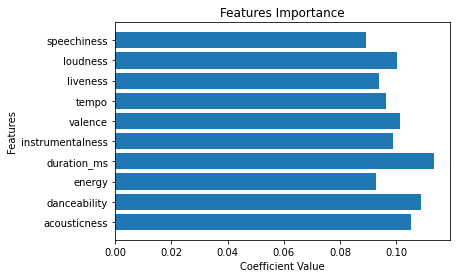

In [ ]:
plt.title("Features Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.barh(X.columns, dt.feature_importances_)

The decision tree classifier's feature importances were very similar for all 10 features. duration_ms is the highest feature, which is different from the logistic regression. However, the second most important feature was the danceability, which is similar to the logistic regression.

# RandomForestClassifier

In [ ]:
X_train_rf = X_train.copy()
y_train_rf = y_train.copy()
X_test_rf = X_test.copy()
y_test_rf = y_test.copy()

rf = RandomForestClassifier(criterion='entropy', random_state=7)
rf.fit(X_train_rf, y_train_rf)

#predict the labels for the test set
y_pred_rf = rf.predict(X_test_rf)

# Evaluate the Predictions
print('The accuracy of the model is: {}'.format(rf.score(X_test_rf, y_test_dt)))

The accuracy of the model is: 0.8108646897582855


Hyperparameter Tuning:

In [ ]:
for n in range(10, 100, 5):
  rf = RandomForestClassifier(criterion='entropy', random_state=7, n_estimators=n)
  rf.fit(X_train_rf, y_train_rf)
  
  #predict the labels for the test set
  y_pred_rf = rf.predict(X_test_rf)

  # Evaluate the Predictions
  print('The accuracy of the model with {} trees is: {}'.format(n, rf.score(X_test_rf, y_test_dt))) 

The accuracy of the model with 10 trees is: 0.7949165213057563
The accuracy of the model with 15 trees is: 0.7868178420134563
The accuracy of the model with 20 trees is: 0.7982805880887117
The accuracy of the model with 25 trees is: 0.7991527535509594
The accuracy of the model with 30 trees is: 0.8051333167206579
The accuracy of the model with 35 trees is: 0.8031397956640917
The accuracy of the model with 40 trees is: 0.8055071019187641
The accuracy of the model with 45 trees is: 0.8045103413904809
The accuracy of the model with 50 trees is: 0.808746573635684
The accuracy of the model with 55 trees is: 0.8060054821829056
The accuracy of the model with 60 trees is: 0.8088711687017194
The accuracy of the model with 65 trees is: 0.8067530525791179
The accuracy of the model with 70 trees is: 0.808746573635684
The accuracy of the model with 75 trees is: 0.8081235983055071
The accuracy of the model with 80 trees is: 0.8107400946922502
The accuracy of the model with 85 trees is: 0.80974333416

We try to retune it this time, but with large number of n_estimators since our data set is huge:

In [ ]:
for n in range(600, 1100, 100):
  rf = RandomForestClassifier(criterion='entropy', random_state=7, n_estimators=n)
  rf.fit(X_train_rf, y_train_rf)
  
  #predict the labels for the test set
  y_pred_rf = rf.predict(X_test_rf)

  # Evaluate the Predictions
  print('The accuracy of the model with {} trees is: {}'.format(n, rf.score(X_test_rf, y_test_dt))) 

The accuracy of the model with 600 trees is: 0.8129828058808871
The accuracy of the model with 700 trees is: 0.812609020682781
The accuracy of the model with 800 trees is: 0.8146025417393471
The accuracy of the model with 900 trees is: 0.8134811861450286
The accuracy of the model with 1000 trees is: 0.8128582108148518


We ran the random forest classification with the n_estimators from 600 to 1000 in increments of 100. We used large numbers of trees because our dataset is so large. The highest accuracy we got was 81.5% with 800 trees. We noticed that the accuracy increased at 800 trees then started to decrease again. The accuracy with random forest classification is slightly higher compared to decision tree classification's accuracy.

In [ ]:
rf = RandomForestClassifier(criterion='entropy', random_state=7, n_estimators=800)
rf.fit(X_train_rf, y_train_rf)

#predict the labels for the test set
y_pred_rf = rf.predict(X_test_rf)
print(classification_report(y_test_rf, y_pred_rf, target_names = ['unpopular', 'popular']))

              precision    recall  f1-score   support

   unpopular       0.80      0.89      0.85      4605
     popular       0.83      0.71      0.76      3421

    accuracy                           0.81      8026
   macro avg       0.82      0.80      0.81      8026
weighted avg       0.82      0.81      0.81      8026



The accuracy of our random forest classification model with 800 trees is 81.5%, which is pretty good. We can see that precision is similar for unpopular and popular songs. The recall is much higher for unpopular songs. The f1-score is also higher for unpopular songs. 

In [ ]:
# rf will be for 800 trees since that was the last run
for i in range (len(X.columns)):
  print(X.columns[i] , ":", rf.feature_importances_[i])

acousticness : 0.1098229682344235
danceability : 0.10173686097904963
energy : 0.09674299068533208
duration_ms : 0.10165014904411265
instrumentalness : 0.09976297811541396
valence : 0.09889939711706965
tempo : 0.09760392387794302
liveness : 0.09788205058861582
loudness : 0.10080806310186434
speechiness : 0.09509061825617539


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


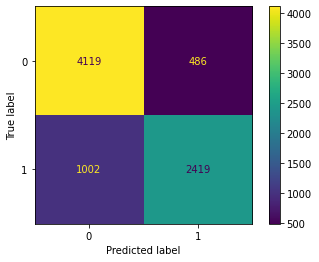

In [ ]:
plot_confusion_matrix(estimator=rf, X=X_test_rf, y_true=y_test_rf)

From the confusion matrix above, we can see that we have a very high amount of True Positives (4119) and True Negatives (2419) and a very low amount of False Negatives and False Positives - therefore our model is doing a good job avoiding Type 1 and Type 2 errors although not entirely. This makes sense since our model has approximately 81% accuracy.

Using the feature_importances_ function, we observed that none of these factors had much more of an impact than another in terms of influencing popularity. This is not surprising considering our EDA on pop music showed that there were no strong correlations. Below is a clear visualization bar chart to show which features affect the model the most.

<BarContainer object of 10 artists>

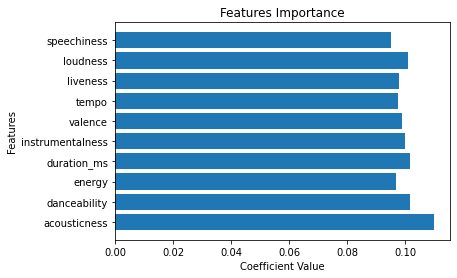

In [ ]:
plt.title("Features Importance")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.barh(X.columns, rf.feature_importances_)

In this model, the acousticness had the most impact on the model. This is similar to the logistic regression's feature importance, which had acousticness as the second most impactful feature.

# K-Nearest Neighbors

In [ ]:
df_copy1 = maindf.copy()
df_copy1.head()

,Artist Name,Track Name,Genres,Playlist,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,id,uri,track_href,analysis_url,duration_ms,time_signature,Is Popular
0,James,Laid,"['britpop', 'madchester', 'new wave', 'new wav...",Alternative 90s,0.457,0.909,0,-9.451,1,0.0317,...,0.1350,0.755,115.998,2CdS3DRqWR5LAhy4hM5X9W,spotify:track:2CdS3DRqWR5LAhy4hM5X9W,https://api.spotify.com/v1/tracks/2CdS3DRqWR5L...,https://api.spotify.com/v1/audio-analysis/2CdS...,156667,4,1
1,grandson,In Over My Head,"['modern alternative rock', 'modern rock', 'ro...",Alternative Beats,0.582,0.817,0,-6.475,1,0.0399,...,0.5750,0.622,155.124,3r0mb1tzAcCNoA8YRXuIhZ,spotify:track:3r0mb1tzAcCNoA8YRXuIhZ,https://api.spotify.com/v1/tracks/3r0mb1tzAcCN...,https://api.spotify.com/v1/audio-analysis/3r0m...,198366,4,1
2,Foals,On The Luna,"['alternative dance', 'indie rock', 'modern al...",Alternative 10s,0.525,0.976,0,-2.023,1,0.0479,...,0.0804,0.855,138.984,0Sfj5fPqZzCq9o3f1NNphz,spotify:track:0Sfj5fPqZzCq9o3f1NNphz,https://api.spotify.com/v1/tracks/0Sfj5fPqZzCq...,https://api.spotify.com/v1/audio-analysis/0Sfj...,192695,4,1
3,Longpigs,She Said,"['britpop', 'sheffield indie']",Alternative 90s,0.210,0.870,5,-5.985,1,0.0606,...,0.1880,0.517,168.352,5J7l2wE9wxqod7xIP0jyAB,spotify:track:5J7l2wE9wxqod7xIP0jyAB,https://api.spotify.com/v1/tracks/5J7l2wE9wxqo...,https://api.spotify.com/v1/audio-analysis/5J7l...,264067,4,0
4,Beastie Boys,Sure Shot,"['alternative rock', 'east coast hip hop', 'go...",Alternative 90s,0.692,0.799,1,-7.924,1,0.1640,...,0.3010,0.549,97.978,21REQ1bCUWphT2QK3bLWYQ,spotify:track:21REQ1bCUWphT2QK3bLWYQ,https://api.spotify.com/v1/tracks/21REQ1bCUWph...,https://api.spotify.com/v1/audio-analysis/21RE...,199667,4,1


In [ ]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

In [ ]:
y_ros.value_counts()

1    15073
0    15073
Name: Is Popular, dtype: int64

When choosing the number of neighbors for our KNN model, we decided to use the most simple way by applying the formulat k = N^(1/2) where k is the number of neighbors and N is the number of features. 

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_ros, y_ros, random_state=7, test_size=0.3)

# normalize features
scaler = StandardScaler()
scaler.fit(X_train_knn)
X_train_knn = scaler.transform(X_train_knn)
# encode & scale the new/test data
X_test_knn = scaler.transform(X_test_knn) #scale the test data

knn = KNeighborsClassifier(n_neighbors=int((10**(1/2))))
knn.fit(X_train_knn, y_train_knn)
y_pred_class = knn.predict(X_test_knn)
print("The accuracy is", metrics.accuracy_score(y_test_knn, y_pred_class))

The accuracy is 0.7167182662538699


We used a k-value of 3, the accuracy of the model is around 72%.

In [ ]:
print(classification_report(y_test_knn, y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      4557
           1       0.69      0.77      0.73      4487

    accuracy                           0.72      9044
   macro avg       0.72      0.72      0.72      9044
weighted avg       0.72      0.72      0.72      9044



We then decided to further test which values of k gives us the best result, graphed the results, and evaluated the results from the graph to get the best value of k.

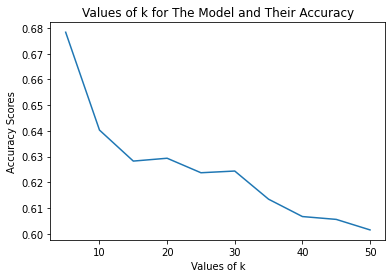

In [ ]:
accuracy_scores = {}
for k in range(5, 51, 5): #increment k by 5
    knn_test = KNeighborsClassifier(n_neighbors = k) #initialize the classifier and set the number of neighbors
    knn_test.fit(X_train_knn, y_train_knn)
    accuracy_scores[k] = knn_test.score(X_test_knn, y_test_knn)

plt.xlabel("Values of k")
plt.ylabel("Accuracy Scores")
plt.title("Values of k for The Model and Their Accuracy")
sns.lineplot(x=accuracy_scores.keys(), y=accuracy_scores.values())
plt.show()

In [ ]:
print(accuracy_scores)

{5: 0.6783502874834144, 10: 0.6403140203449801, 15: 0.6282618310482088, 20: 0.6293675364882795, 25: 0.6237284387439186, 30: 0.624391862007961, 35: 0.6134453781512605, 40: 0.6067005749668288, 45: 0.6055948695267581, 50: 0.6015037593984962}


We can then conclude that the model with value of k=3 gives us the best accuracy.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


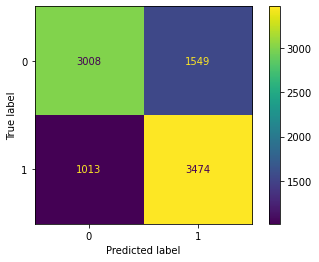

In [ ]:
plot_confusion_matrix(estimator=knn, X=X_test_knn, y_true=y_test_knn)

From the confusion matrix above, we can see that we have a very high amount of True Positives (3622) and True Negatives (3181) and a very low amount of False Negatives and False Positives - therefore our model is doing a good job avoiding Type 1 and Type 2 errors although not entirely. This makes sense since our model has a 72% accuracy.

In [ ]:
std_score = knn.score(X_test_knn, y_test_knn)
std_score

0.7167182662538699

## Creating a table to store relative feature importances:

In [ ]:
feat_imp = pd.DataFrame({'acousticness': [0], 'danceability': [0], 'energy': [0], 'duration_ms': [0], 
                         'instrumentalness': [0], 'valence': [0],
            'tempo': [0],'liveness': [0], 'loudness': [0], 'speechiness': [0]})
feat_imp.head()

,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness
0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_df = pd.DataFrame(X_test_knn, columns = ['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence',
            'tempo','liveness', 'loudness', 'speechiness'])
X_test_df

,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness
0,1.050665,0.781608,-1.142996,-0.235946,-0.436596,-0.415591,-0.610969,1.091375,0.166044,-0.212782
1,-0.632967,-0.951845,0.345823,-0.772193,-0.436596,-0.359706,1.828928,-0.502086,0.761282,-0.292021
2,-0.458365,0.655210,-1.047252,0.037871,-0.436596,2.034767,0.208683,-1.012380,-1.817062,-0.633530
3,-0.700407,-0.386065,0.288377,1.804339,1.594422,-0.260831,-0.401675,-0.682721,0.221743,-0.630182
4,-0.651226,-1.583834,-0.147259,-0.501881,-0.436426,0.173355,1.140737,0.323675,-0.507539,-0.468355
...,...,...,...,...,...,...,...,...,...,...
9039,-0.700308,1.028384,-0.013217,-0.317346,-0.429840,1.566190,0.123656,0.226906,0.086169,-0.640226
9040,-0.702939,-1.830610,1.331986,0.344287,2.794569,1.037428,1.285767,0.259163,0.378738,-0.394697
9041,-0.693526,-0.205497,1.288901,-1.044804,-0.436585,-0.080279,1.910136,0.839776,1.033959,4.495800
9042,1.267491,-0.301800,-1.085550,0.190001,-0.426189,-0.419890,0.269674,0.181747,-0.297599,-0.569915


Here, we perform the permutation feature importance algorithm. Since KNN model does not have a built-in feature importance algorithm, we will manually permutate (randomly shuffle) the data for each feature to break off the relationship between the given feature and the target—popularity of each song. We do this in order to observe any potentional drop in the model score, for it tells us how much the model depends on that feature. The model's dependency on a feature is synonymous to feature importance. 

### Permutate *acousticness* and find the change in accuracy to add into the feature importances table

In [ ]:
test_acoustic = X_test_df.copy()
test_acoustic['acousticness'] = np.random.permutation(test_acoustic['acousticness'])
knn.score(test_acoustic, y_test_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6441839893852278

In [ ]:
feat_imp['acousticness'] = std_score - knn.score(test_acoustic, y_test_knn)
feat_imp

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness
0,0.072534,0,0,0,0,0,0,0,0,0


We randomly shuffle the data stored in each feature column and computed the model score with the given feature variable and the test dataset. Then, the newly found model score is subtracted from the old model score to observe any decrease. The difference is stored in the table, as shown above. The process repeats for all the other features. 

### Permutate *danceability* and find the change in accuracy to add into the feature importances table

In [ ]:
test_danceability = X_test_df.copy()
test_danceability['danceability'] = np.random.permutation(test_danceability['danceability'])
knn.score(test_danceability, y_test_knn)
feat_imp['danceability'] = std_score - knn.score(test_danceability, y_test_knn)
feat_imp

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness
0,0.072534,0.092326,0,0,0,0,0,0,0,0


### Do the same process for every other feature:

In [ ]:
# energy
test_energy = X_test_df.copy()
test_energy['energy'] = np.random.permutation(test_energy['energy'])
knn.score(test_energy, y_test_knn)
feat_imp['energy'] = std_score - knn.score(test_energy, y_test_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# duration_ms
test_duration_ms = X_test_df.copy()
test_duration_ms['duration_ms'] = np.random.permutation(test_duration_ms['duration_ms'])
knn.score(test_duration_ms, y_test_knn)
feat_imp['duration_ms'] = std_score - knn.score(test_duration_ms, y_test_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# instrumentalness
test_instrumentalness = X_test_df.copy()
test_instrumentalness['instrumentalness'] = np.random.permutation(test_instrumentalness['instrumentalness'])
knn.score(test_instrumentalness, y_test_knn)
feat_imp['instrumentalness'] = std_score - knn.score(test_instrumentalness, y_test_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# valence
test_valence = X_test_df.copy()
test_valence['valence'] = np.random.permutation(test_valence['valence'])
knn.score(test_valence, y_test_knn)
feat_imp['valence'] = std_score - knn.score(test_valence, y_test_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# tempo
test_tempo = X_test_df.copy()
test_tempo['tempo'] = np.random.permutation(test_tempo['tempo'])
knn.score(test_tempo, y_test_knn)
feat_imp['tempo'] = std_score - knn.score(test_tempo, y_test_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# liveness
test_liveness = X_test_df.copy()
test_liveness['liveness'] = np.random.permutation(test_liveness['liveness'])
knn.score(test_liveness, y_test_knn)
feat_imp['liveness'] = std_score - knn.score(test_liveness, y_test_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# loudness
test_loudness = X_test_df.copy()
test_loudness['loudness'] = np.random.permutation(test_loudness['loudness'])
knn.score(test_loudness, y_test_knn)
feat_imp['loudness'] = std_score - knn.score(test_loudness, y_test_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# speechiness
test_speechiness = X_test_df.copy()
test_speechiness['speechiness'] = np.random.permutation(test_speechiness['speechiness'])
knn.score(test_speechiness, y_test_knn)
feat_imp['speechiness'] = std_score - knn.score(test_speechiness, y_test_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
feat_imp

,acousticness,danceability,energy,duration_ms,instrumentalness,valence,tempo,liveness,loudness,speechiness
0,0.072534,0.092326,0.076404,0.064794,0.048762,0.089783,0.088125,0.079611,0.073087,0.048872


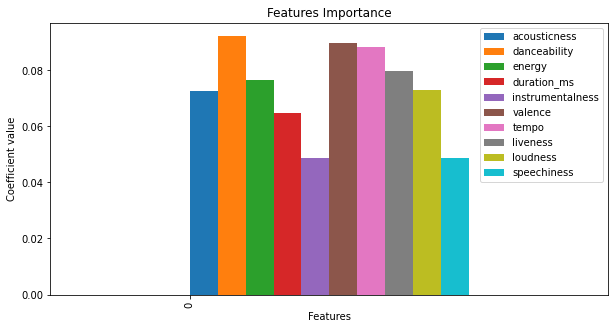

In [ ]:

features = ['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence',
            'tempo','liveness', 'loudness', 'speechiness']

feat_imp.plot(kind = 'bar', figsize=(10, 5), align='edge')
plt.xlabel("Features")
plt.ylabel("Coefficient value")
plt.title("Features Importance")
plt.show()

The bar graph shows the drop in model score after permutation for each feature variable. We observe the biggest drop in model score for danceability, valence, and tempo, which tells us that they have the most impact in predicting popularity for this model. Speechiness and instrumentalness, on the other hand, given its lowest drop in model score, are the features with the least importance to the model.  

# Results and Reflection 

### Best Model

Overall, we think the best model to work with is the random forest classification model. The logistic regression had a low accuracy, so we ruled it out. The decision tree classification had a good accuracy, but the random forest was slightly better. Similarly, the K-nearest neighbors model had a lower accuracy compared to random forest. With random forest, we can also easily get the feature importances, which is important for our goal.

For all models, we split the popularity into popular (1) and unpopular (0). This allowed us to perform classification and get better results with our data.

### Important Features

The main goal of our project was to determine if there are certain features that make songs more popular than others and see their relationships with popularity. Acousticness has the highest score, and speechiness has the lowest score. However, all features have a very similar feature importance score, so we can't say for certain which features make a song more popular.

<BarContainer object of 10 artists>

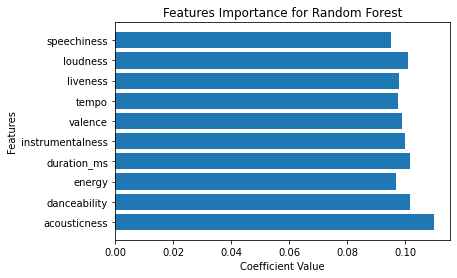

In [ ]:
plt.title("Features Importance for Random Forest")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.barh(X.columns, rf.feature_importances_)

The random forest model is our main model, and we can see that acousticness is the most important feature. However, all features have very similar feature importances. Below are the features importance graph of other models we've tried.

Text(0, 0.5, 'Features')

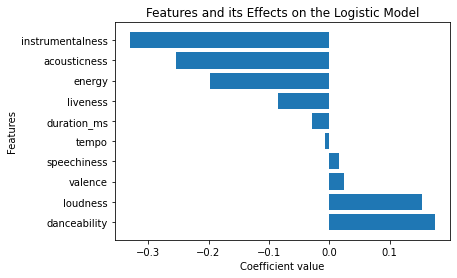

In [ ]:
fig, ax = plt.subplots()
ax.barh(features_imp['Features'], features_imp['Coefficient Value'])
plt.title("Features and its Effects on the Logistic Model")
plt.xlabel("Coefficient value")
plt.ylabel("Features")

<BarContainer object of 10 artists>

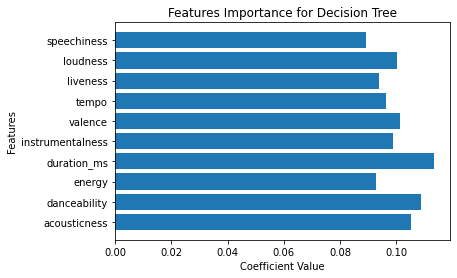

In [ ]:
plt.title("Features Importance for Decision Tree")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.barh(X.columns, dt.feature_importances_)

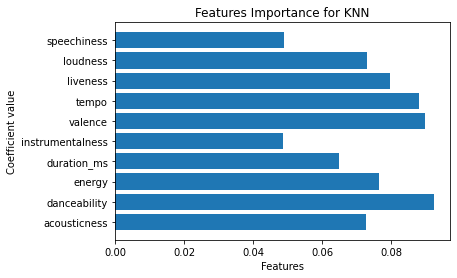

In [ ]:
features = ['acousticness', 'danceability', 'energy', 'duration_ms', 'instrumentalness', 'valence',
            'tempo','liveness', 'loudness', 'speechiness']

plt.barh(features, feat_imp.loc[0])
plt.xlabel("Features")
plt.ylabel("Coefficient value")
plt.title("Features Importance for KNN")
plt.show()

The logistic model is the only model that can show whether each feature has a negative or positive effect on the popularity. Even though acousticness has a higher importance in most of the models, from the logistic regression we can see that it actually has a negative impact on the popularity. This means artists should actually avoid having too high of an acousticness score.

On the other hand, danceability is the feature with the largest positive impact on the logistic model. It also has a fairly high importance value in the other models as well. This means artists can probably focus on having songs with high danceability. 

Overall, the ten features that we used to predict popularity all have very similar feature importances in all four models. While we can make inferences about certain features, we can't say for certain that there is a single feature that impacts popularity the most. Instead, most popular songs will require a combination of all features.

We're using the logistic regression model's coefficient values to determine if the features are going to have a negative impact or a positive impact on the positivity, we're still going to use the coefficient values from our random forest classifier model, however, the signs (+ and -) of the coefficient values will be based on the ones shown in the logistic regression model. We're doing this because the random forest classifier doesn't have a built-in function to illustrate the impact's magnitude on the popularity. This might affect the accuracy and the results of our investigation.

<BarContainer object of 10 artists>

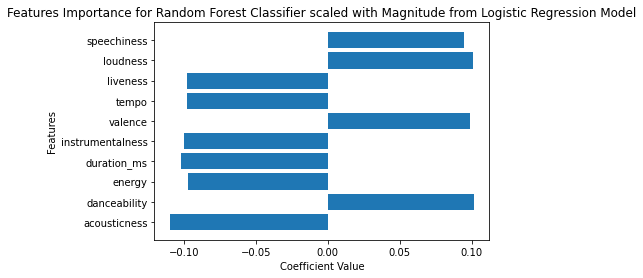

In [ ]:
features_rf_scaled = rf.feature_importances_

features_rf_scaled[0] = -features_rf_scaled[0]
features_rf_scaled[4] = -features_rf_scaled[4] 
features_rf_scaled[2] = -features_rf_scaled[2] 
features_rf_scaled[6] = -features_rf_scaled[6]
features_rf_scaled[3] = -features_rf_scaled[3]
features_rf_scaled[7] = -features_rf_scaled[7]
plt.title("Features Importance for Random Forest Classifier scaled with Magnitude from Logistic Regression Model")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.barh(X.columns, features_rf_scaled)

After looking at the visual above, we can conclude that the relationships between the features and the popularity of a song is presented below:

In [ ]:
results = [["speechiness", "positive", 0.09509061825617539], 
           ["loudness", "positive", 0.10080806310186434], 
           ["valence", "positive", 0.09889939711706965],
           ["danceability", "positive", 0.10173686097904963], 
           ["liveness", "negative", 0.09788205058861582], 
           ["tempo", "negative", 0.09760392387794302],
           ["instrumentalness", "negative", 0.09976297811541396], 
           ["duration_ms", "negative", 0.10165014904411265], 
           ["energy", "negative", 0.09674299068533208], 
           ["acousticness", "negative", 0.1098229682344235]]
results_table = pd.DataFrame(results, columns = ['Features', 'Impact', 'Coefficient Value'])
results_table


,Features,Impact,Coefficient Value
0,speechiness,positive,0.095091
1,loudness,positive,0.100808
2,valence,positive,0.098899
3,danceability,positive,0.101737
4,liveness,negative,0.097882
5,tempo,negative,0.097604
6,instrumentalness,negative,0.099763
7,duration_ms,negative,0.101650
8,energy,negative,0.096743
9,acousticness,negative,0.109823
